In [8]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [9]:
# Given parameters
nx = 60
ny = 60
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_uniform_result = "../__result/ex16_diffusion/ex16_POD_inner_uniform_gappy_result.p"
file_name_SVD="../__model/ex16_diffusion/ex16_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# of measurments: 12
[  61   90  118 1201 1230 1258 2341 2370 2398 3481 3510 3538]


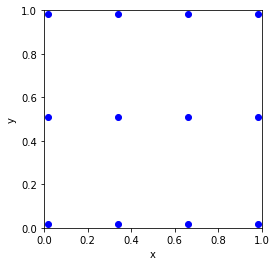

In [10]:
# uniform
msmt_i,msmt_j=np.meshgrid([1,30,58],[1,20,39,58],indexing='xy')
msmt_idx = np.sort(np.ravel_multi_index((msmt_j.flatten(),msmt_i.flatten()),dims))

num_msmt=len(msmt_idx)
print("# of measurments: {}".format(num_msmt))
print(msmt_idx)

# plot measuremnt positions
plt.figure()
plt.scatter(y[msmt_idx],x[msmt_idx], color = 'blue')
plt.axis('square')
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("../__result/ex16_diffusion/ex16_POD_uniform_{}_samples.png".format(num_msmt))

# gappyPOD

# of POD basis is 3
# of measurments: 12
[  61   90  118 1201 1230 1258 2341 2370 2398 3481 3510 3538]


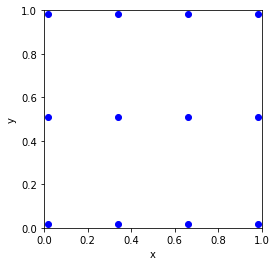

Param is 75
Time elapsed: 0.9753391742706299 sec
average relative error of u: 7.1770517788427055%
maximum relative error of u: 7.950244385792995%

Param is 76
Time elapsed: 1.0841305255889893 sec
average relative error of u: 7.203039271017821%
maximum relative error of u: 7.981326536573772%

Param is 77
Time elapsed: 1.0797061920166016 sec
average relative error of u: 7.227626561559686%
maximum relative error of u: 8.014321237085575%

Param is 78
Time elapsed: 1.0500760078430176 sec
average relative error of u: 7.251824008606052%
maximum relative error of u: 8.05041619552249%

Param is 79
Time elapsed: 1.0509121417999268 sec
average relative error of u: 7.276791395734694%
maximum relative error of u: 8.09089051755794%

Param is 80
Time elapsed: 1.0337955951690674 sec
average relative error of u: 7.3037677868462545%
maximum relative error of u: 8.136910817317549%

Param is 81
Time elapsed: 1.0361173152923584 sec
average relative error of u: 7.334064262948595%
maximum relative error of u

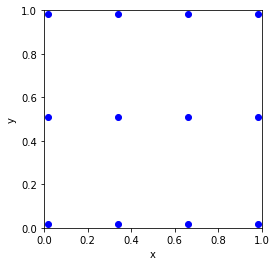

Param is 75
Time elapsed: 0.6010217666625977 sec
average relative error of u: 6.916750778377137%
maximum relative error of u: 7.814616189393779%

Param is 76
Time elapsed: 0.7907423973083496 sec
average relative error of u: 6.881442296329145%
maximum relative error of u: 7.768480933045334%

Param is 77
Time elapsed: 0.8641421794891357 sec
average relative error of u: 6.836790940973833%
maximum relative error of u: 7.710962782228559%

Param is 78
Time elapsed: 0.8580281734466553 sec
average relative error of u: 6.783166769522792%
maximum relative error of u: 7.642438391144426%

Param is 79
Time elapsed: 0.7702658176422119 sec
average relative error of u: 6.721067607092894%
maximum relative error of u: 7.563441230352497%

Param is 80
Time elapsed: 0.8976848125457764 sec
average relative error of u: 6.6510814609998885%
maximum relative error of u: 7.474628896946199%

Param is 81
Time elapsed: 0.8504042625427246 sec
average relative error of u: 6.573887565882486%
maximum relative error of 

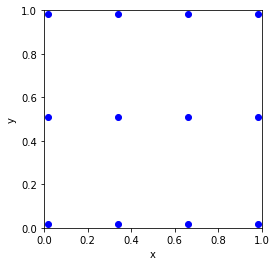

Param is 75
Time elapsed: 0.7043416500091553 sec
average relative error of u: 3.9177426001670637%
maximum relative error of u: 4.544795228616453%

Param is 76
Time elapsed: 0.7461850643157959 sec
average relative error of u: 3.808173030748971%
maximum relative error of u: 4.403867075457722%

Param is 77
Time elapsed: 0.7401509284973145 sec
average relative error of u: 3.6960395891451796%
maximum relative error of u: 4.255110040721574%

Param is 78
Time elapsed: 0.7531349658966064 sec
average relative error of u: 3.5835715999166116%
maximum relative error of u: 4.100518929352159%

Param is 79
Time elapsed: 0.6428177356719971 sec
average relative error of u: 3.4734478017239043%
maximum relative error of u: 3.942633161655846%

Param is 80
Time elapsed: 0.7519693374633789 sec
average relative error of u: 3.368669243702888%
maximum relative error of u: 3.784490291407853%

Param is 81
Time elapsed: 0.731032133102417 sec
average relative error of u: 3.272686156821089%
maximum relative error o

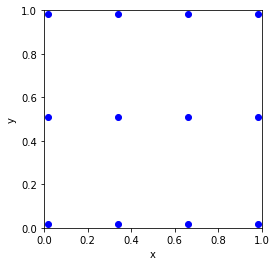

Param is 75
Time elapsed: 0.5745375156402588 sec
average relative error of u: 4.357518512839122%
maximum relative error of u: 5.7195516792262975%

Param is 76
Time elapsed: 0.45429325103759766 sec
average relative error of u: 4.14163644297941%
maximum relative error of u: 5.422003065679178%

Param is 77
Time elapsed: 0.48026227951049805 sec
average relative error of u: 3.920431804119499%
maximum relative error of u: 5.102895903891057%

Param is 78
Time elapsed: 0.5058093070983887 sec
average relative error of u: 3.698546089589295%
maximum relative error of u: 4.764826752311199%

Param is 79
Time elapsed: 0.498995304107666 sec
average relative error of u: 3.481967930414418%
maximum relative error of u: 4.411779869338045%

Param is 80
Time elapsed: 0.42039942741394043 sec
average relative error of u: 3.278031853273627%
maximum relative error of u: 4.048639293055222%

Param is 81
Time elapsed: 0.43712902069091797 sec
average relative error of u: 3.0957320678304123%
maximum relative error 

In [11]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))

    # uniform
    msmt_i,msmt_j=np.meshgrid([1,30,58],[1,20,39,58],indexing='xy')
    msmt_idx = np.sort(np.ravel_multi_index((msmt_j.flatten(),msmt_i.flatten()),dims))

    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(y[msmt_idx],x[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex16_diffusion/ex16_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_uniform_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [12]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

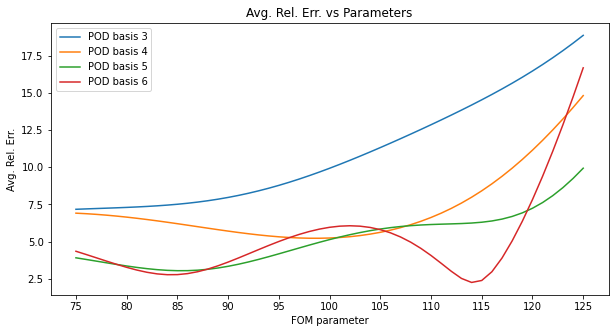

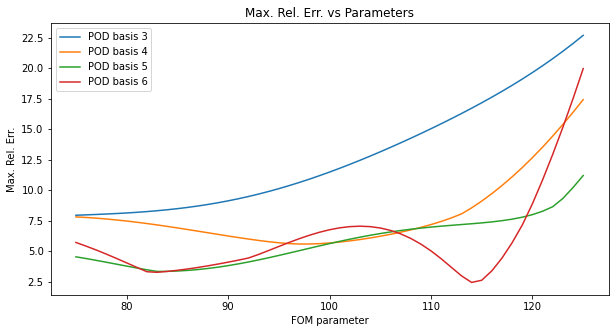

In [13]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
plt.savefig("../__result/ex16_diffusion/ex16_POD_inner_uniform_avg_rel_err.png")

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
plt.savefig("../__result/ex16_diffusion/ex16_POD_inner_uniform_max_rel_err.png")

In [18]:
idx=[2]
POD_basis=num_basis[idx]
print(POD_basis)

[5]


Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

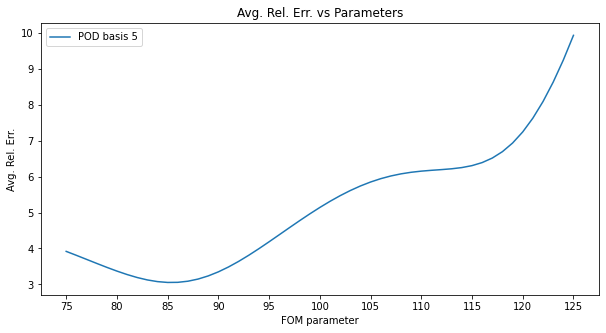

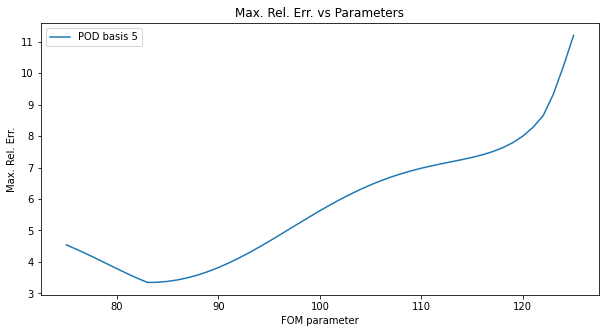

In [19]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_POD_{}_uniform_avg_rel_err.png".format(POD_basis))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_POD_{}_uniform_max_rel_err.png".format(POD_basis))

In [20]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


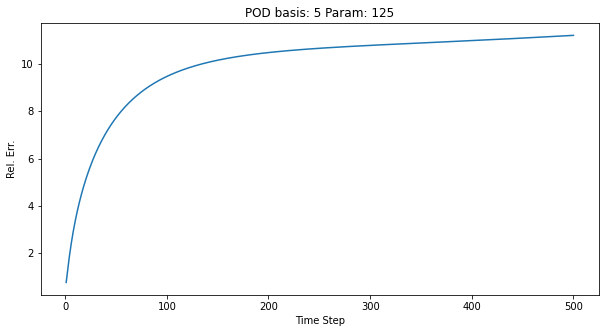

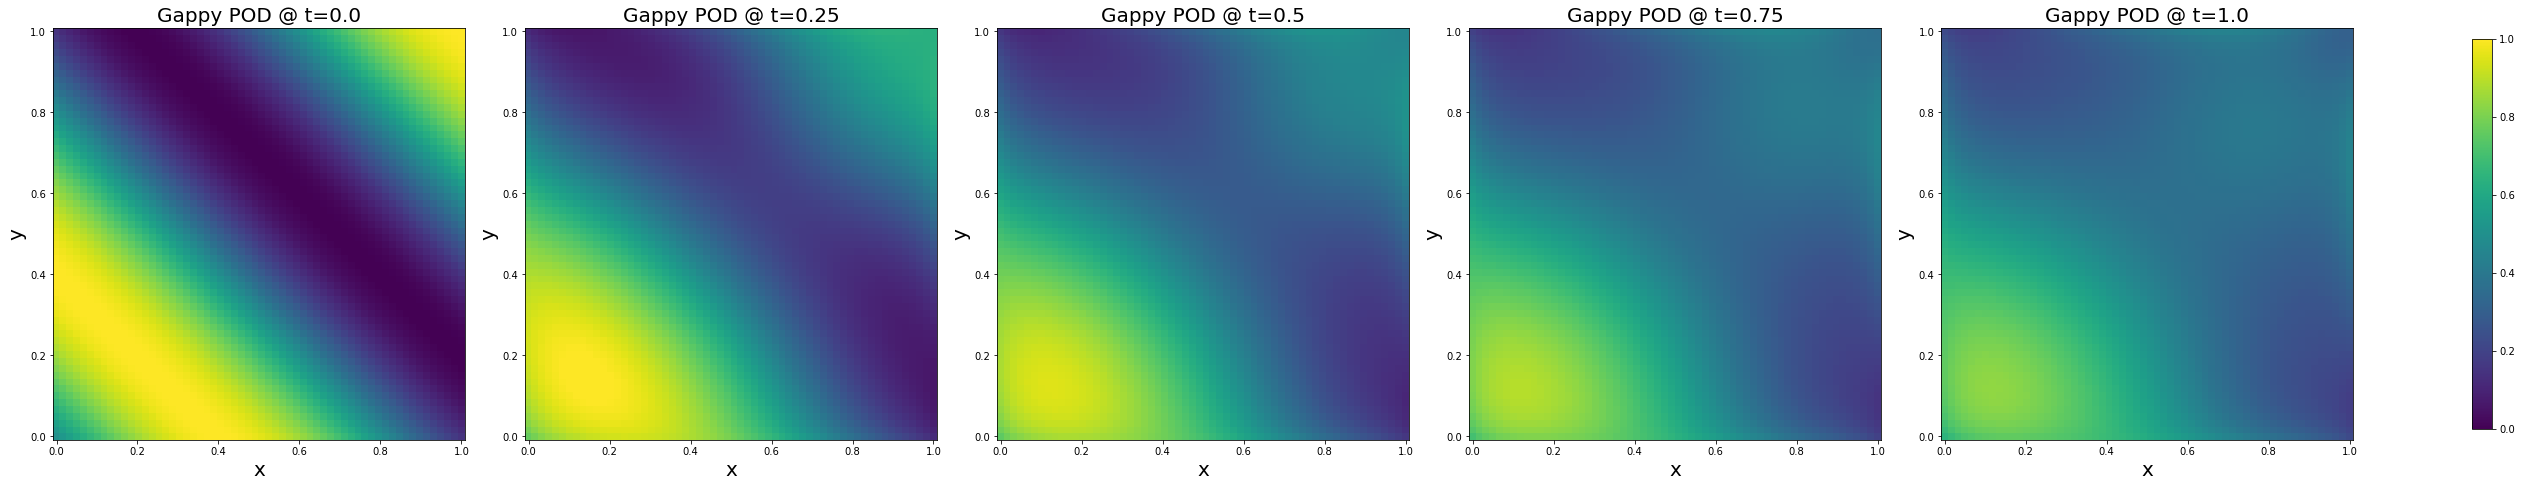

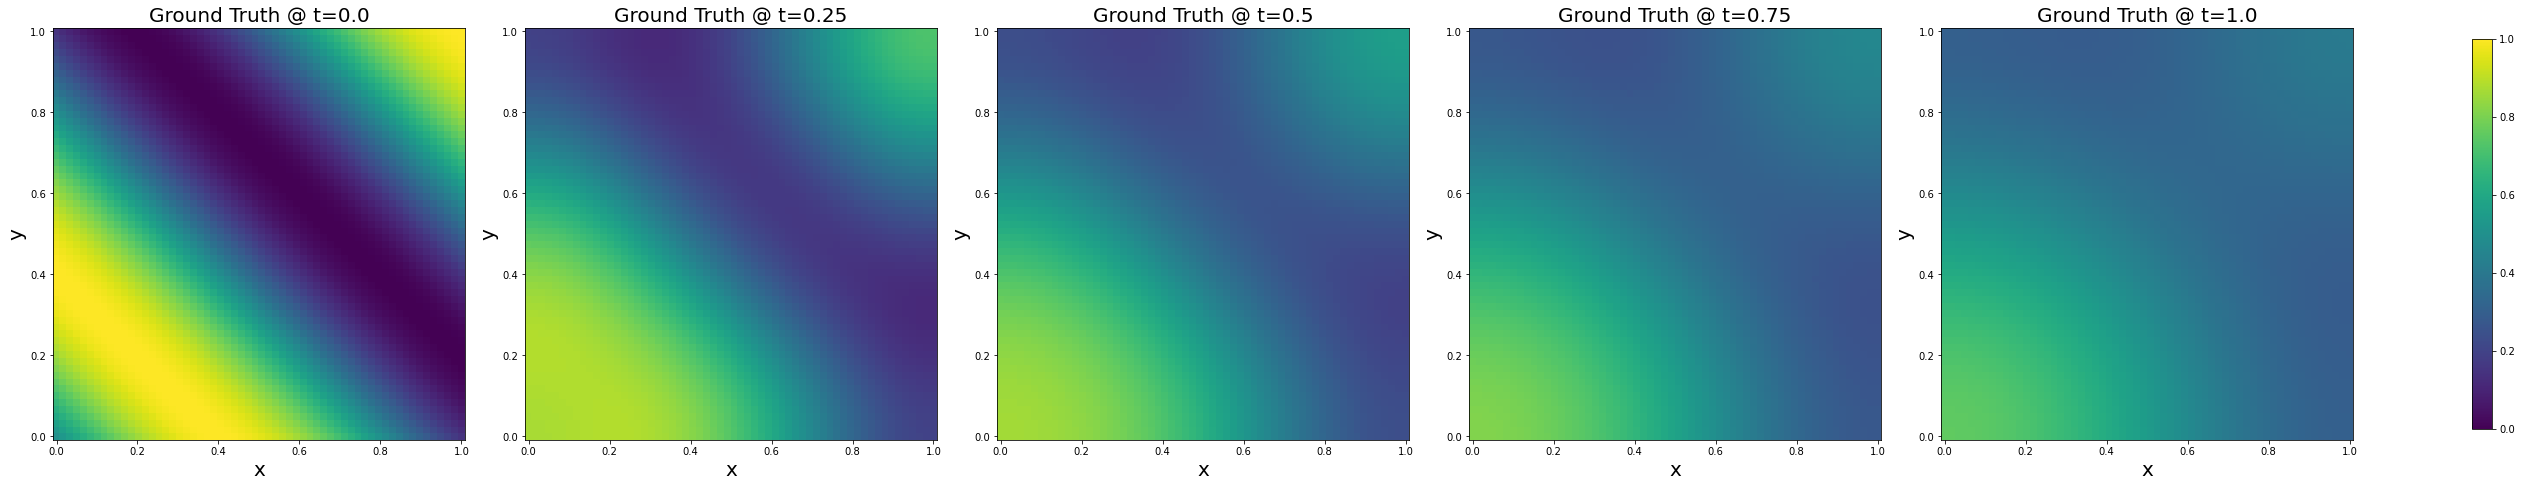

In [21]:
# figure rel.err vs at given param and POD basis
i=2;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex16_diffusion/ex16_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
plt.savefig("../__result/ex16_diffusion/ex16_POD_{}_inner_uniform_SOL.png".format(POD_basis))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
plt.savefig("../__result/ex16_diffusion/ex16_ground_truth.png")